# Tata Steel Stock Price Predictions

# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Read the Dataset

In [2]:
df=pd.read_csv("TATASTEEL.NS (1).csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.172855,11.214964,11.035300,11.186892,2.568285,10242229.0
1,1996-01-02,11.172855,11.214964,10.951082,10.979155,2.520592,16954313.0
2,1996-01-03,10.979155,11.229000,10.951082,10.981962,2.521237,13514114.0
3,1996-01-04,10.807913,10.807913,10.386825,10.633863,2.441320,34785820.0
4,1996-01-05,10.504730,10.555260,10.316644,10.423319,2.392984,30138033.0
...,...,...,...,...,...,...,...
6866,2023-04-11,105.550003,107.849998,105.099998,107.550003,107.550003,49304956.0
6867,2023-04-12,108.199997,108.400002,106.949997,107.599998,107.599998,27349538.0
6868,2023-04-13,107.500000,108.150002,105.900002,107.500000,107.500000,34880922.0
6869,2023-04-17,107.599998,108.300003,106.750000,107.150002,107.150002,24642162.0


## Data Exploration

### Summarize the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6871 non-null   object 
 1   Open       6864 non-null   float64
 2   High       6864 non-null   float64
 3   Low        6864 non-null   float64
 4   Close      6864 non-null   float64
 5   Adj Close  6864 non-null   float64
 6   Volume     6864 non-null   float64
dtypes: float64(6), object(1)
memory usage: 375.9+ KB


### Descriptive Summary of Data

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6.864000e+03
mean,37.789490,38.398499,37.098333,37.718267,15.757361,6.982651e+07
std,29.604842,30.016965,29.104956,29.542239,19.703162,5.831510e+07
min,3.705570,3.910499,3.705570,3.775751,0.902283,0.000000e+00
25%,10.554558,10.702640,10.366472,10.504730,2.432781,3.292896e+07
50%,34.616764,35.114075,33.954185,34.530851,12.302627,5.383640e+07
75%,50.849415,51.657379,50.037729,50.813896,18.808940,8.758241e+07
max,161.486557,161.486557,161.486557,161.486557,123.550003,6.428460e+08


### Check if there were any null values

In [6]:
df.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Check if there were any duplicate values

In [9]:
df.duplicated().sum()

0

## Feature Engineering

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.172855,11.214964,11.035300,11.186892,2.568285,10242229.0
1,1996-01-02,11.172855,11.214964,10.951082,10.979155,2.520592,16954313.0
2,1996-01-03,10.979155,11.229000,10.951082,10.981962,2.521237,13514114.0
3,1996-01-04,10.807913,10.807913,10.386825,10.633863,2.441320,34785820.0
4,1996-01-05,10.504730,10.555260,10.316644,10.423319,2.392984,30138033.0


### Split Date into Year, Month and Date

In [11]:
df["Year"]=df["Date"].str[0:4]

In [12]:
df["date"]=df["Date"].str[8:10]

In [13]:
df["month_num"]=df["Date"].str[5:7]

In [14]:
def month_name(num):
    if num == "01":
        return "January"
    elif num == "02":
        return "February"
    elif num == "03":
        return "March"
    elif num == "04":
        return "April"
    elif num == "05":
        return "May"
    elif num == "06":
        return "June"
    elif num == "07":
        return "July"
    elif num == "08":
        return "August"
    elif num == "09":
        return "September"
    elif num == "10":
        return "October"
    elif num == "11":
        return "November"
    elif num == "12":
        return "December"
    else:
        return "Invalid Month"

In [15]:
df["month_name"]=df["Date"].str[5:7].apply(month_name)

In [16]:
df["Year"]=df["Year"].astype(int)
df["date"]=df["date"].astype(int)
df["month_num"]=df["month_num"].astype(int)

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

## EDA

### Opening vs Closing 

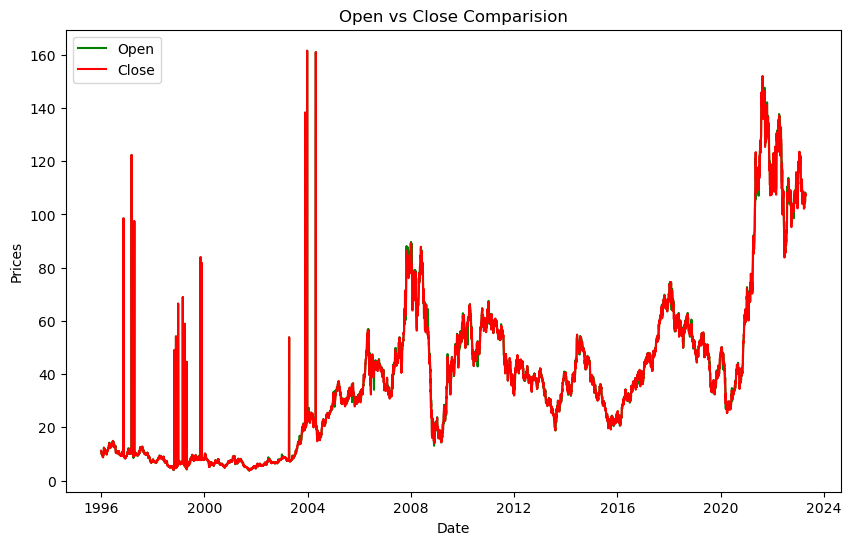

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df["Date"],y=df["Open"],c="g", label="Open")
sns.lineplot(x=df["Date"],y=df["Close"],c="r", label="Close")
plt.ylabel("Prices")
plt.title("Open vs Close Comparision")
plt.legend()

#### Observations:
- Opening prices were mostly higher than closing

### Prices by date

In [19]:
sorted_df=df.sort_values(by="date")

In [20]:
sorted_df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,date,month_num,month_name
0,1996-01-01,11.172855,11.214964,11.035300,11.186892,2.568285,10242229.0,1996,1,1,January
4702,2014-07-01,50.495041,51.952728,50.495041,51.509705,19.121082,55762230.0,2014,1,7,July
761,1998-12-01,4.803205,5.131653,4.794783,5.081122,1.166523,61206692.0,1998,1,12,December
2948,2007-06-01,47.279709,48.072193,47.096954,47.279709,14.531234,17940414.0,2007,1,6,June
6324,2021-02-01,60.490002,64.000000,59.744999,63.610001,27.656687,210846940.0,2021,1,2,February
...,...,...,...,...,...,...,...,...,...,...,...
4476,2013-07-31,19.826448,20.741076,19.278625,20.550529,7.628629,65774010.0,2013,31,7,July
4640,2014-03-31,36.647015,37.761715,36.489815,37.533058,13.932767,73888761.0,2014,31,3,March
6551,2021-12-31,110.500000,112.349998,110.264999,111.144997,49.405617,36870210.0,2021,31,12,December
5170,2016-05-31,30.916304,32.154861,30.511391,31.854750,12.419637,105401750.0,2016,31,5,May


Text(0.5, 1.0, 'Opening Prices by Dates')

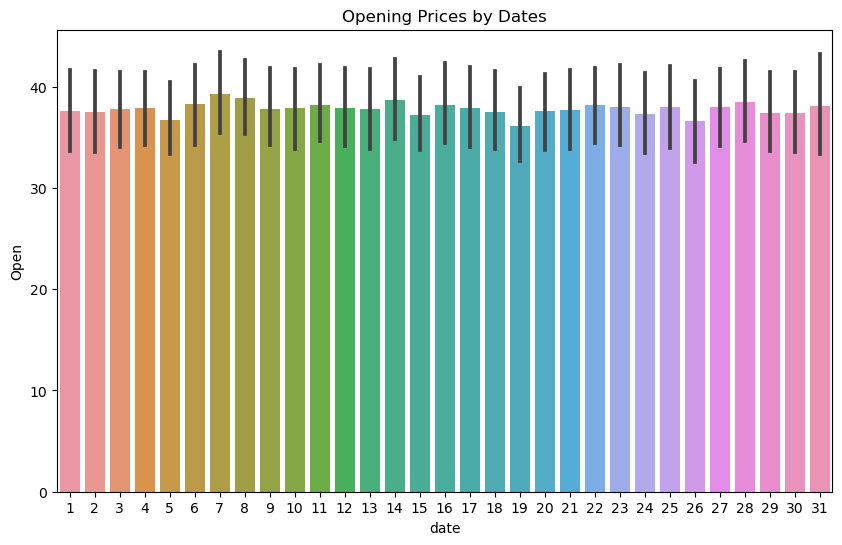

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_df["date"],y=sorted_df["Open"])
plt.title("Opening Prices by Dates")

### Open Prices by month

In [22]:
sorted_df=df.sort_values(by="month_num")

Text(0.5, 1.0, 'Opening Prices by Months')

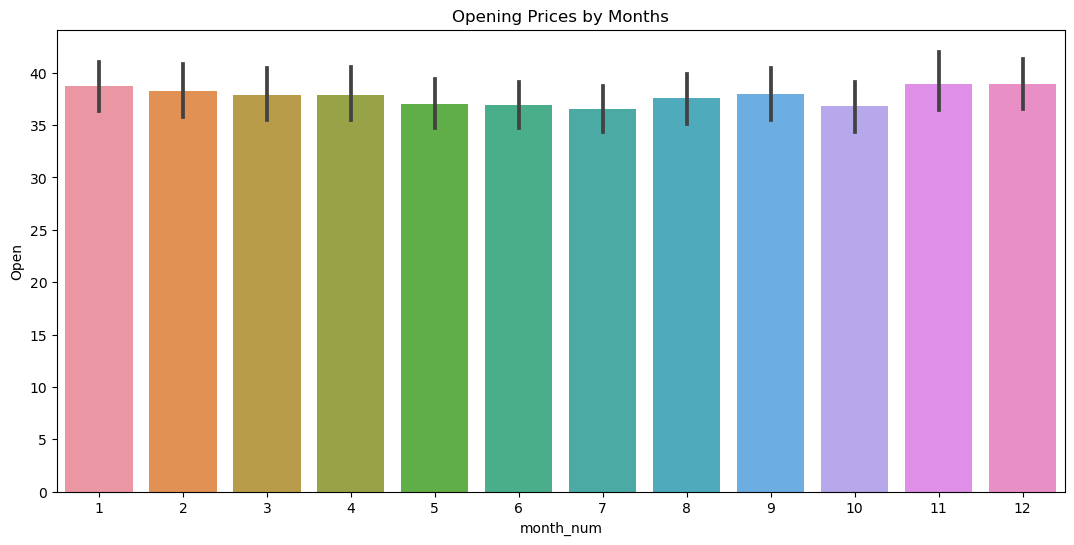

In [23]:
plt.figure(figsize=(13,6))
sns.barplot(x=sorted_df["month_num"],y=sorted_df["Open"])
plt.title("Opening Prices by Months")

## Coreleation of features

<AxesSubplot: >

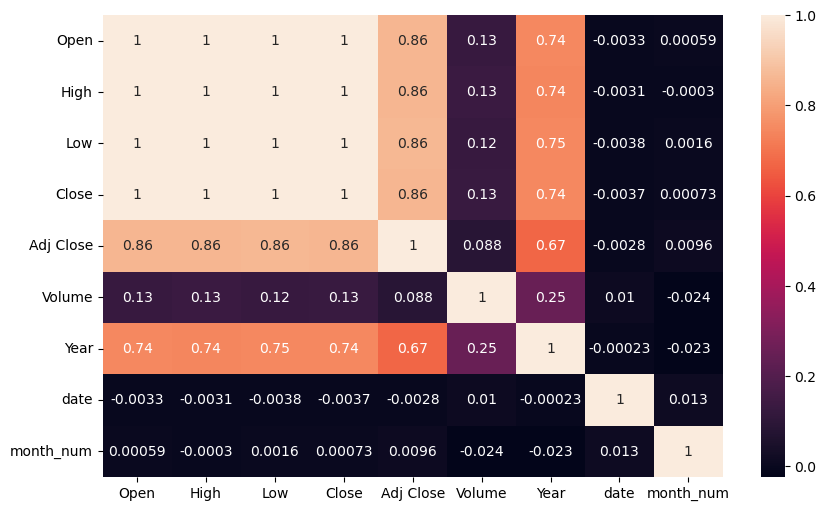

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

### Observations:
- High, Low, Close were very similar to Open. so we can drop them
- As it will be difficult to predict Adj close and also Volume by the user, its better to remove those also
- As we cant use DateTime directly in ML training, remove Date also

In [25]:
df.drop(["High","Low","Close","Adj Close","Volume","Date"],axis=1,inplace=True)

In [26]:
df=df.sample(frac=1)

In [27]:
df

,Open,Year,date,month_num,month_name
1827,8.531233,2003,1,1,January
5006,20.960205,2015,24,9,September
5091,23.842234,2016,2,2,February
24,9.783266,1996,2,2,February
2208,15.889036,2004,17,6,June
...,...,...,...,...,...
5341,45.264519,2017,7,2,February
2916,38.681099,2007,16,4,April
2044,19.681631,2003,31,10,October
2287,24.759947,2004,6,10,October


## Divide and Split data for model building

In [28]:
x=df.drop(["Open","month_name"],axis=1)

In [29]:
y=df["Open"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=25,random_state=25)

## Import the Models

In [32]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Model 1 

In [33]:
model1=AdaBoostRegressor()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)

In [34]:
from sklearn.metrics import r2_score

In [35]:
r2_score(y_test,y_pred)

0.8289919993040091

### Model 2

In [36]:
model2=GradientBoostingRegressor()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
r2_score(y_test,y_pred)

0.9758945593446587

In [37]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [38]:
mean_absolute_error(y_test,y_pred)

4.411787734307934

In [39]:
mean_absolute_percentage_error(y_test,y_pred)

0.11575102566528347